In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np

In [ ]:
!unzip  /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.5.zip

In [ ]:
path = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrict_2tasks.4/hwu64_bert_adapter_ewc_freeze_random'
# path = 's200r-EWCFreeze-v2.5/bert_dis_bert_adapter_ewc_freeze_random'

In [ ]:
pathb = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/hwuRBS-AdapterSEQ-copy/hwu64_bert_adapter_seq_random'

### Best F1 Analysis

In [ ]:
from collections import Counter
# EWC/CTR/SEQ: check best f1 location
best_f1_location_check = []
overfit_task = []
kt_task = []
for seed_idx in [101,2650,0]:
    for rand_idx in range(7):
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        temp_best = []
        for i in range(5): # Exclude the last task
            location = np.argmax(f1_matrix[i:,i])
            best_f1_location_check.append(location==0)
            if location==0:
                overfit_task.append(i)
            if location!=0:
                kt_task.append(i)
print(np.mean(best_f1_location_check))
print('kt tasks:',Counter(kt_task))
print('overfit tasks:',Counter(overfit_task))

0.8761904761904762
kt tasks: Counter({3: 5, 2: 4, 0: 4})
overfit tasks: Counter({1: 21, 4: 21, 0: 17, 2: 17, 3: 16})


### Metrics

In [ ]:
overall_f1 = []
forgetting = []
best_f1 = []
worst_f1 = []
for seed_idx in [0]:
# for seed_idx in [0,101,2650]:
    # for rand_idx in range(7):
    # for rand_idx in [0,2,10,12,13,14,15]:
    for rand_idx in [0,3,6]:
    # for rand_idx in [0,10,13]:
    # for rand_idx in [0]:
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        print(f1_matrix)
        # if 'annomi' in path and 'rrr' in path and rand_idx==0:
            # print('modified for annomi')
            # overall_f1.append(np.mean(f1_matrix[3,:]))
            # temp_forgetting = []
            # for i in range(3):
            #     temp_forgetting.append(np.max(f1_matrix[i:-3,i])-f1_matrix[3,i])
            # forgetting.append(np.mean(temp_forgetting))
            # temp_best = []
            # for i in range(4):
            #     temp_best.append(np.max(f1_matrix[i:,i]))
            # best_f1.append(np.mean(temp_best))
            # temp_worst = []
            # for i in range(4):
            #     temp_worst.append(np.min(f1_matrix[i:-2,i]))
            # worst_f1.append(np.mean(temp_worst))
        # else:
        overall_f1.append(np.mean(f1_matrix[1,:2])) # overall_f1.append(np.mean(f1_matrix[5,:]))
        temp_forgetting = []
        for i in range(1): # for i in range(5):
            temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[1,i]) # temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
        forgetting.append(np.mean(temp_forgetting))
        temp_best = []
        # for i in range(6):
        #     temp_best.append(np.max(f1_matrix[i:,i]))
        # best_f1.append(np.mean(temp_best))
        # temp_worst = []
        # for i in range(6):
        #     temp_worst.append(np.min(f1_matrix[i:,i]))
        # worst_f1.append(np.mean(temp_worst))
# assert len(overall_f1)==21
# assert len(forgetting)==21
# assert len(best_f1)==21
# assert len(worst_f1)==21
print(len(overall_f1))

[[0.9266 0.     0.     0.     0.     0.    ]
 [0.4662 0.9891 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]
[[0.6941 0.     0.     0.     0.     0.    ]
 [0.1873 0.9813 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]
[[0.6967 0.     0.     0.     0.     0.    ]
 [0.4284 0.7181 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.    ]]
3


In [ ]:
overall_f1 = [val*100 for val in overall_f1]
print(np.mean(overall_f1), np.std(overall_f1))
print(np.mean(forgetting)*100)
# print(np.mean(best_f1)*100)
# print(np.mean(worst_f1)*100)

62.839999999999996 7.0325185152025504
41.18333333333333


In [ ]:
!unzip  /content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200r-EWCFreeze-v2.1.zip

In [ ]:
# path2 = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/AnnoMIStr-TaskDrop/annomi_taskdrop_random'
path2 = 's200r-EWCFreeze-v2.1/bert_dis_bert_adapter_ewc_freeze_random'

In [ ]:
overall_f1_compare = []
forgetting_compare = []
best_f1_compare = []
worst_f1_compare = []
for seed_idx in [0]:
# for seed_idx in [101,2650,0]:
    # for rand_idx in range(7):
    # for rand_idx in [0,2,10,12,13,14,15]:
    for rand_idx in [0,3,6]:
        list_of_lists = []
        with open(path2+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        # print(f1_matrix)
        # if 'annomi' in path2 and 'replay' in path2 and rand_idx==0:
        #     print('modified for annomi')
        #     overall_f1_compare.append(np.mean(f1_matrix[3,:]))
        #     temp_forgetting = []
        #     for i in range(3):
        #         temp_forgetting.append(np.max(f1_matrix[i:-3,i])-f1_matrix[3,i])
        #     forgetting_compare.append(np.mean(temp_forgetting))
        #     temp_best = []
        #     for i in range(4):
        #         temp_best.append(np.max(f1_matrix[i:,i]))
        #     best_f1_compare.append(np.mean(temp_best))
        #     temp_worst = []
        #     for i in range(4):
        #         temp_worst.append(np.min(f1_matrix[i:-2,i]))
        #     worst_f1_compare.append(np.mean(temp_worst))
        # else:
        overall_f1_compare.append(np.mean(f1_matrix[5,:]))
        temp_forgetting = []
        for i in range(5):
            temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
        forgetting_compare.append(np.mean(temp_forgetting))
        temp_best = []
        for i in range(6):
            temp_best.append(np.max(f1_matrix[i:,i]))
        best_f1_compare.append(np.mean(temp_best))
        temp_worst = []
        for i in range(6):
            temp_worst.append(np.min(f1_matrix[i:,i]))
        worst_f1_compare.append(np.mean(temp_worst))
# assert len(overall_f1_compare)==21
# assert len(forgetting_compare)==21
# assert len(best_f1_compare)==21
# assert len(worst_f1_compare)==21
print(len(overall_f1_compare))

3


In [ ]:
overall_f1_compare = [val*100 for val in overall_f1_compare]
print(np.mean(overall_f1_compare), np.std(overall_f1_compare))
print(np.mean(forgetting_compare)*100)
print(np.mean(best_f1_compare)*100)
print(np.mean(worst_f1_compare)*100)

83.22333333333334 1.8766049920791208
1.328000000000001
84.71222222222222
69.97888888888889


### Diaz+Chaudhary Metrics

In [ ]:
mtl = [0.8558,0.8918,0.8365,0.9120,0.8918,0.8038,0.9120]

In [ ]:
overall_f1 = []
bwt1 = []
bwt2 = []
bwt3 = []
pbwt3 = []
p2bwt3 = []
fwt = []
# rem = []
# pbwt = []
# intra = []
for seed_idx in [0]:
# for seed_idx in [101,2650,0]:
    mtl_idx=0
    # for rand_idx in range(7):
    for rand_idx in [0,3,6]:
    # for rand_idx in [0,10,13]:
    # for rand_idx in [0,2,10,12,13,14,15]:
        list_of_lists = []
        with open(path+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix = np.array(list_of_lists)
        assert f1_matrix.shape == (6,6)
        # print(f1_matrix)
        # temp_acc = []
        # for i in range(6):
        #     temp_acc.append(np.mean(f1_matrix[i,:i+1]))
        # overall_f1.append(np.mean(temp_acc))
        # temp_bwt1 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_bwt1.append(f1_matrix[i,j]-f1_matrix[j,j])
        # bwt1.append(np.mean(temp_bwt1))
        # temp_bwt2 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_bwt2.append(f1_matrix[i,j]-np.max([f1_matrix[k,j] for k in range(j,i)]))
        #         # print(i,j,[f1_matrix[k,j] for k in range(j,i)])
        # bwt2.append(np.mean(temp_bwt2))
        # temp_bwt3 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_bwt3.append(f1_matrix[i,j]-f1_matrix[i-1,j])
        # bwt3.append(np.mean(temp_bwt3))
        #################################################################
        # temp_pbwt3 = []
        # for i in [1,2,3,4,5]:
        #     for j in range(0,i):
        #         temp_pbwt3.append(np.maximum(f1_matrix[i,j]-f1_matrix[i-1,j],0))
        # pbwt3.append(np.mean(temp_pbwt3))
        temp_p2bwt3 = []
        for i in [1]: # for i in [1,2,3,4,5]:
            for j in range(0,i):
                temp_p2bwt3.append(np.maximum(f1_matrix[i,j]-f1_matrix[i-1,j],0))
        check = sum([True if val>0 else False for val in temp_p2bwt3])
        if check>0:
            p2bwt3.append(np.true_divide(sum(temp_p2bwt3),check))
        else:
            p2bwt3.append(0)
        # rem.append(1-
        #            np.absolute(
        #                np.minimum(np.mean(temp_bwt),0)
        #                )
        #            )
        # pbwt.append(np.maximum(np.mean(temp_bwt),0))
        # intra.append(mtl[mtl_idx]-f1_matrix[5,5])
        # mtl_idx+=1
        list_of_lists = []
        with open(pathb+str(rand_idx)+'_seed'+str(seed_idx)+'_f1.txt', 'r') as f:
            for line in f:
                inner_list = [float(elt.strip()) for elt in line.split('\t')]
                list_of_lists.append(inner_list)
        f1_matrix_seq = np.array(list_of_lists)
        temp_fwt = []
        for i in [1]: # for i in [1,2,3,4,5]:
            temp_fwt.append(f1_matrix[i,i]-f1_matrix_seq[i,i])
        fwt.append(np.mean(temp_fwt))
# assert len(overall_f1)==21
# assert len(bwt)==21
# assert len(rem)==21
# assert len(pbwt)==21
# assert len(intra)==21
print(len(overall_f1))

0


In [ ]:
# overall_f1 = [val*100 for val in overall_f1]
# print(np.mean(overall_f1), np.std(overall_f1))
# print(np.mean(bwt1)*100)
# print(np.mean(bwt2)*100)
# print(np.mean(bwt3)*100)
# print(np.mean(pbwt3)*100)
print(np.mean(p2bwt3)*100)
print(np.mean(fwt)*100)
# print(np.mean(rem)*100)
# print(np.mean(pbwt)*100)
# print(np.mean(intra)*100)

0.0
20.72666666666666


### Significance Test

In [ ]:
from scipy.stats import ttest_ind, ttest_rel

In [ ]:
res = ttest_rel(overall_f1,overall_f1_compare, alternative='greater')
t = res[0]
p = res[1]
alpha = 0.1
# test if A > B
if p < alpha and t > 0:
  # reject the null hypothesis (no effect) => A > B !!
  print('Yes!', p)
else:
  # accept the null hypothesis => no effect
  print('No!', p)

Yes! 0.03357277954113428


In [ ]:
res = ttest_ind(forgetting_compare,forgetting)
t = res[0]
p = res[1]
alpha = 0.1
# test if A > B
if p/2 < alpha and t>0:
  # reject the null hypothesis (no effect) => A > B !!
  print('Yes!')
else:
  # accept the null hypothesis => no effect
  print('No!', p/2)

Yes!


### Modified ParamCount - EWC Freeze

In [ ]:
import pickle
import torch

In [ ]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [ ]:
path3 = 's200r-EWCFreeze-v2.4/modified_paramcount_random'

In [ ]:
check_counts = {}
for seed in [0,101,2650]:
    for rand_idx in [0,3,6]:
        for m in [1,2,3,4,5]:
            with open(path3+str(rand_idx)+'_seed'+str(seed)+'model_'+str(m)+'.pkl', 'rb') as handle:
                # temp = torch.load(handle, map_location=torch.device('cpu'))
                temp = CPU_Unpickler(handle).load()
                check_counts['random'+str(rand_idx)+'seed'+str(seed)+'model'+str(m)] = temp


In [ ]:
for k,v in check_counts['random6seed2650model5'].items():
  print(k,v)

bert.encoder.layer.0.attention.output.LayerNorm.weight tensor(767)
bert.encoder.layer.0.attention.output.LayerNorm.bias tensor(763)
bert.encoder.layer.0.attention.output.adapter.fc1.weight tensor(1526263)
bert.encoder.layer.0.attention.output.adapter.fc1.bias tensor(1993)
bert.encoder.layer.0.attention.output.adapter.fc2.weight tensor(1514594)
bert.encoder.layer.0.attention.output.adapter.fc2.bias tensor(760)
bert.encoder.layer.0.output.LayerNorm.weight tensor(767)
bert.encoder.layer.0.output.LayerNorm.bias tensor(760)
bert.encoder.layer.0.output.adapter.fc1.weight tensor(1529991)
bert.encoder.layer.0.output.adapter.fc1.bias tensor(1993)
bert.encoder.layer.0.output.adapter.fc2.weight tensor(1525499)
bert.encoder.layer.0.output.adapter.fc2.bias tensor(761)
bert.encoder.layer.1.attention.output.LayerNorm.weight tensor(767)
bert.encoder.layer.1.attention.output.LayerNorm.bias tensor(763)
bert.encoder.layer.1.attention.output.adapter.fc1.weight tensor(1528659)
bert.encoder.layer.1.attentio

### Unstable ParamCount

In [ ]:
import pickle
import torch
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [ ]:
path3 = '/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/s200rME3-EWCFreeze-v2.1-IC/random'

In [ ]:
check_counts = {}
# for seed in [0,101,2650]:
for seed in [0]:
    # for rand_idx in [0,3,6]:
    for rand_idx in [0]:
        for m in [1,2,3,4,5]:
            with open(path3+str(rand_idx)+'_seed'+str(seed)+'model_'+str(m)+'_instability_paramcount.pkl', 'rb') as handle:
                # temp = torch.load(handle, map_location=torch.device('cpu'))
                temp = CPU_Unpickler(handle).load()
                check_counts['random'+str(rand_idx)+'seed'+str(seed)+'model'+str(m)] = temp

In [ ]:
for k,v in check_counts['random0seed0model3'].items():
  print(k,v)
  break

bert.encoder.layer.0.attention.output.LayerNorm.weight tensor(740)


### Sensitivity Graph

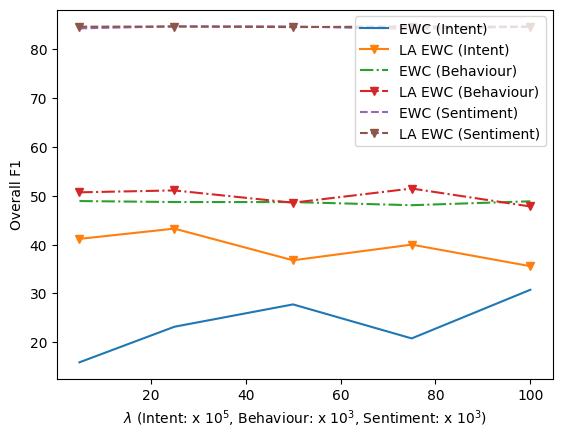

In [ ]:
import matplotlib.pyplot as plt

x_i = [5, 25, 50, 75, 100]
y1 = [15.88, 23.17, 27.75, 20.78, 30.75]
y2 = [41.18, 43.28, 36.79, 40.00, 35.58]
x_b = [5,25,50,75,100]
y3 = [48.93,48.73,48.72,48.08,48.88]
y4 = [50.72,51.11,48.59,51.50,47.82]
x_s = [5,25,50,75,100]
y5 = [84.32,84.74,84.72,84.19,84.68]
y6 = [84.67,84.69,84.58,84.70,84.66]

plt.plot(x_i, y1, label ='EWC (Intent)',)
plt.plot(x_i, y2, '-v', label ='LA EWC (Intent)')
plt.plot(x_b, y3, '-.', label ='EWC (Behaviour)')
plt.plot(x_b, y4, '-.v', label ='LA EWC (Behaviour)')
plt.plot(x_s, y5, '--', label ='EWC (Sentiment)')
plt.plot(x_s, y6, '--v', label ='LA EWC (Sentiment)')

plt.xlabel("$\lambda$ (Intent: x $10^5$, Behaviour: x $10^3$, Sentiment: x $10^3$)")
plt.ylabel("Overall F1")
plt.legend(loc='upper right')
# plt.title('Sensitivity analysis')
plt.show()

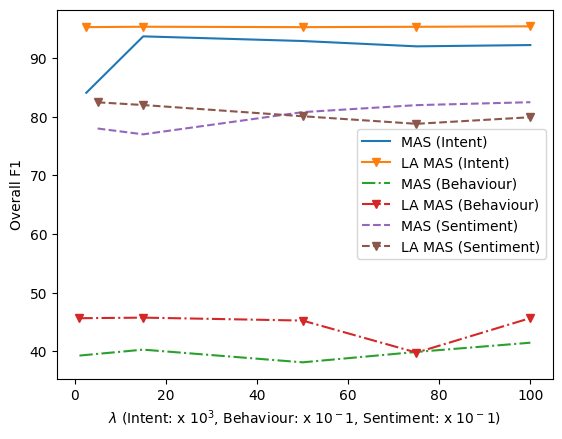

In [ ]:
import matplotlib.pyplot as plt

x_i = [2.5,15,50,75,100]
y1 = [84.04,93.65,92.86,91.95,92.17]
y2 = [95.22,95.29,95.22,95.28,95.36]
x_b = [1,15,50,75,100]
y3 = [39.30,40.31,38.15,39.92,41.49]
y4 = [45.66,45.76,45.26,39.81,45.68]
x_s = [5,15,50,75,100]
y5 = [77.96,76.97,80.75,81.94,82.44]
y6 = [82.42,81.96,80.05,78.76,79.88]

plt.plot(x_i, y1, label ='MAS (Intent)')
plt.plot(x_i, y2, '-v', label ='LA MAS (Intent)')
plt.plot(x_b, y3, '-.', label ='MAS (Behaviour)')
plt.plot(x_b, y4, '-.v', label ='LA MAS (Behaviour)')
plt.plot(x_s, y5, '--', label ='MAS (Sentiment)')
plt.plot(x_s, y6, '--v', label ='LA MAS (Sentiment)')

plt.xlabel("$\lambda$ (Intent: x $10^3$, Behaviour: x $10^-1$, Sentiment: x $10^-1$)")
plt.ylabel("Overall F1")
plt.legend()
# plt.title('Sensitivity analysis')
plt.show()

### Look-Ahead

Text(0, 0.5, 'Overall F1')

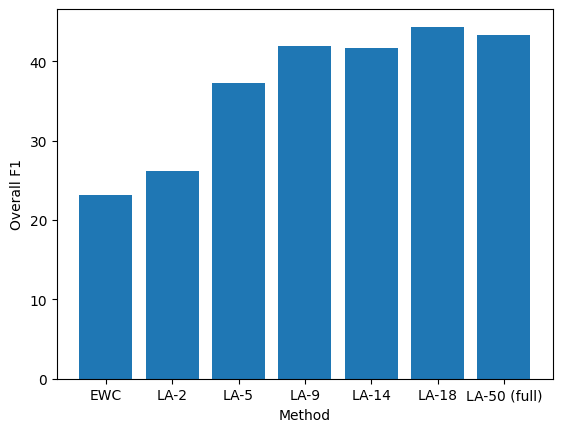

In [ ]:
import matplotlib.pyplot as plt

x = ['EWC','LA-2','LA-5','LA-9','LA-14','LA-18','LA-50 (full)']
y = [23.17,26.14,37.29,41.90,41.64,44.36,43.28]

plt.bar(x,y)
plt.xlabel("Method")
plt.ylabel("Overall F1")

### Loss Curve

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
paths = ['/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/IntentSH_NoL1NoRegLAEWC_wlast_AdaptKTEasy_2tasks.3/hwu64_bert_adapter_ewc_freeze_fo_valid_acc_1_random0_seed0.txt'
        ,'/content/gdrive/MyDrive/s200_kan_myocc_attributions_lfa/IntentSH_NoL1LAEWC_wlast_AdaptKTEasy_2tasks.3/hwu64_bert_adapter_ewc_freeze_fo_valid_acc_1_random0_seed0.txt'
        ]
labels = ['without regularisation'
          ,'with regularisation'
          ]

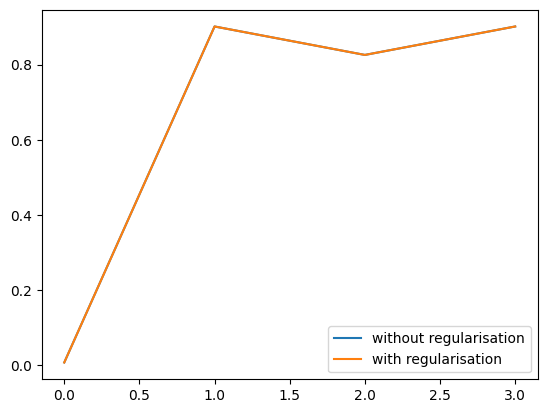

In [ ]:
for label,path in zip(labels,paths):
    y = np.loadtxt(path, dtype=float)
    if len(y)<=50:
        y = y[:-5]
        # y = y
    plt.plot(y, label=label)
plt.legend()
plt.show()

### Alpha_Rel + Alpha_Old

In [ ]:
import pickle
import torch
import io
from matplotlib import pyplot as plt

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

0.5013314 0.5768697
0.61885035 0.9039797
0.5976188 0.91202784
0.56097686 0.90550685
0.6010445 0.9373026
0.52406716 0.7244289
0.68212014 1.0403357
0.733174 1.0537261
0.7228875 1.0892336
0.75466245 1.097213


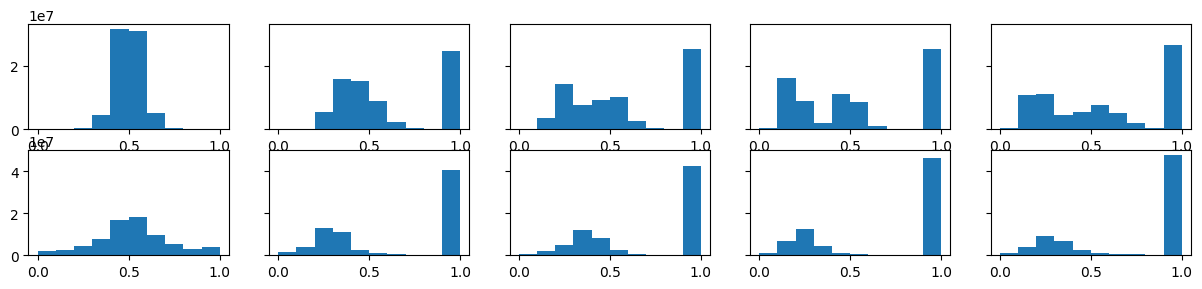

In [ ]:
paths = ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv1FF.13.pdm/' # AdaptKTCFsv2.13
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAMAS_wlast_AdaptKTCFsv2.7/'
        #  ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAMAS_wlast_AdaptKTCFsv2L1.7/'
        #  ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAMAS_wlast_AdaptKTCFsv2.5/'
        ]

# fig, axes = plt.subplots(nrows=1, ncols=3, sharey='row', figsize=(10, 3))
# for seed in [0]:
#     for ax_idx, rand_idx in enumerate([0,3,6]):
#         with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_1_relative_fisher.pkl', 'rb') as handle:
#             alpha_rel = CPU_Unpickler(handle).load()
#             for i,(k,v) in enumerate(alpha_rel.items()):
#               if i==0:
#                   vals = v.flatten()
#               else:
#                   vals = torch.cat((vals,v.flatten()))
#             # print(vals.shape)
#         axes[ax_idx].hist(vals.numpy())

rand_idx, seed = 0, 0
fig, axes = plt.subplots(nrows=2, ncols=5, sharey='row', figsize=(15, 3))
for ax_idx,path_alpharel in enumerate(paths):
    for model_idx in [1,2,3,4,5]:
        with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_'+str(model_idx)+'_relative_fisher.pkl', 'rb') as handle:
            alpha_rel = CPU_Unpickler(handle).load()
            for i,(k,v) in enumerate(alpha_rel.items()):
              if i==0:
                  vals = v.flatten()
              else:
                  vals = torch.cat((vals,v.flatten()))
            # print(vals.shape)
        axes[ax_idx,model_idx-1].hist(vals.numpy())
        # print(np.sum((vals.numpy()>0.5) & (vals.numpy()<0.9)))
        print(np.nanmean(vals.numpy()),np.nanmean(vals.numpy())+np.nanstd(vals.numpy()))

In [ ]:
alpha_rel.keys()

dict_keys(['bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.adapter.fc1.weight', 'bert.encoder.layer.0.attention.output.adapter.fc1.bias', 'bert.encoder.layer.0.attention.output.adapter.fc2.weight', 'bert.encoder.layer.0.attention.output.adapter.fc2.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output.LayerNorm.bias', 'bert.encoder.layer.0.output.adapter.fc1.weight', 'bert.encoder.layer.0.output.adapter.fc1.bias', 'bert.encoder.layer.0.output.adapter.fc2.weight', 'bert.encoder.layer.0.output.adapter.fc2.bias', 'bert.encoder.layer.1.attention.output.LayerNorm.weight', 'bert.encoder.layer.1.attention.output.LayerNorm.bias', 'bert.encoder.layer.1.attention.output.adapter.fc1.weight', 'bert.encoder.layer.1.attention.output.adapter.fc1.bias', 'bert.encoder.layer.1.attention.output.adapter.fc2.weight', 'bert.encoder.layer.1.attention.output.adapter.fc2.bias',

In [ ]:
path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.2.1/' #.7

rand_idx, seed = 0, 0

for model in [1,2,3,4,5]:
    with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_'+str(model)+'_fisher_old.pkl', 'rb') as handle:
        alpha_rel = CPU_Unpickler(handle).load()
        for i,(k,v) in enumerate(alpha_rel.items()):
          if i==0:
              vals = v.flatten()
          else:
              vals = torch.cat((vals,v.flatten()))
    vals = vals.numpy()
    print(model, np.max(vals))

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.2/random0_seed0model_1_fisher_old.pkl'

In [ ]:
path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptZero_2tasks.4/'

check = [0.015, 0.000075, 0.00075]

fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', figsize=(12, 6))
for seed in [0]:
    for ax_idx, rand_idx in enumerate([0,3,6]):
        with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_1_fisher_old.pkl', 'rb') as handle:
            alpha_rel = CPU_Unpickler(handle).load()
            for i,(k,v) in enumerate(alpha_rel.items()):
              if i==0:
                  vals = v.flatten()
              else:
                  vals = torch.cat((vals,v.flatten()))
            # print(vals.shape)
        axes[0,ax_idx].hist(vals.numpy())
        vals = vals.numpy()
        print(np.max(vals), '50:',np.percentile(vals,50), '60:',np.percentile(vals,60), '70:',np.percentile(vals,70), '80:',np.percentile(vals,80), '90:',np.percentile(vals,90), '95:',np.percentile(vals,95))
        axes[1,ax_idx].hist(vals[vals>check[ax_idx]])
        axes[2,ax_idx].hist(vals[vals<check[ax_idx]])

In [ ]:
path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptZero_2tasks.4/'

check = [0.015, 0.000075, 0.00075]

for seed in [0]:
    for ax_idx, rand_idx in enumerate([0,3,6]):
        print(rand_idx)
        with open(path_alpharel+'random'+str(rand_idx)+'_seed'+str(seed)+'model_1_fisher_old.pkl', 'rb') as handle:
            alpha_rel = CPU_Unpickler(handle).load()
            for layer in ['layer.'+ str(i) for i in range(12)]+['last']:
                vals = np.array([])
                for k,v in alpha_rel.items():
                  if layer in k:
                    vals = np.append(vals,v.flatten().numpy())
                print(layer, np.max(vals), np.percentile(vals, 95), np.min(vals))

In [ ]:
# lambda < 1/(eta * alpha)
print(1 / (0.003))
# print(1 / (0.003 * 0.015))
print(1 / (0.003 * 3.1865901757577184e-11))
print(1 / (0.003 * 0.15432867))
print("")
# print(1 / (0.003 * 0.000075))
print(1 / (0.003 * 2.1764677083160722e-12))
print(1 / (0.003 * 0.00066471676))
print("")
# print(1 / (0.003 * 0.00075))
print(1 / (0.003 * 1.261917211350936e-11))
print(1 / (0.003 * 0.0058143595))
print("")
# print(1 / (0.003 * 0.0000000000001))

In [ ]:
# 1/(eta * lambda)
print(1/(0.003 * 5000000)) # 50 x 10^5
print(1/(0.003 * 2159.8924770966623))

### EWC lambda

[0.4708, 0.5819, 0.48995, 0.47125, 0.46825, 0.5625, 0.6004, 0.5038]
[0.0, 0.2272, 0.0069, 0.0195, 0.0021, 0.1843, 0.2192, 0.0198]
[0.9416, 0.9366, 0.973, 0.923, 0.9344, 0.9407, 0.9816, 0.9878]


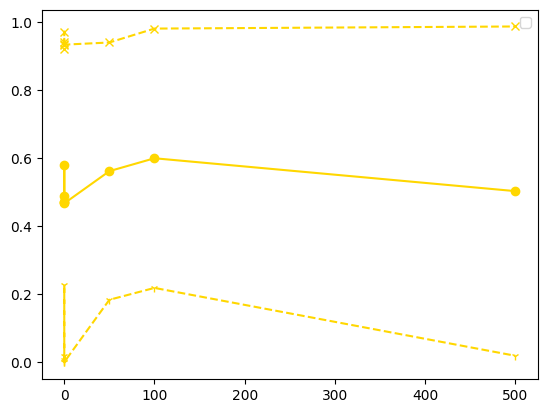

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.7/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.8/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.12/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.5/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.6/'
              ]
x_vals = [0.00001, 0.001, 0.01, 0.02, 0.22, 50, 100, 500] # x 10^5
# 0.001, 100 (x 10^5)

for rand_idx,color in zip([0],['gold']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot(x_vals, l1, marker='o', color=color)
    plt.plot(x_vals, l2, '--', marker='1', color=color)
    plt.plot(x_vals, l3, '--', marker='x', color=color)

print(l1)
print(l2)
print(l3)

plt.legend()
plt.show()

[0.2313, 0.23285, 0.2355, 0.3618, 0.3512, 0.29955, 0.263, 0.49339999999999995]
[0.0, 0.0, 0.0, 0.2561, 0.3758, 0.1079, 0.0721, 0.0095]
[0.4626, 0.4657, 0.471, 0.4675, 0.3266, 0.4912, 0.4539, 0.9773]


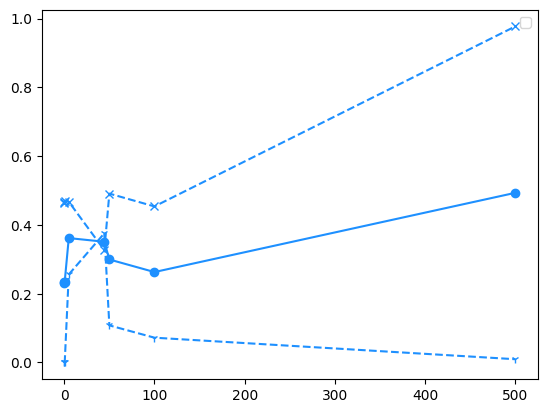

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.9/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.3/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.13/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.5/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.6/'
              ]
x_vals = [0.00001, 0.001, 0.5, 5, 44.44, 50, 100, 500] # x 10^5
# 5, 44.44

for rand_idx,color in zip([3],['dodgerblue']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot(x_vals, l1, marker='o', color=color)
    plt.plot(x_vals, l2, '--', marker='1', color=color)
    plt.plot(x_vals, l3, '--', marker='x', color=color)

print(l1)
print(l2)
print(l3)

plt.legend()
plt.show()

[0.3722, 0.31045, 0.3648, 0.37129999999999996, 0.4219, 0.29675, 0.36195000000000005, 0.43515]
[0.0, 0.0, 0.3728, 0.254, 0.114, 0.1834, 0.0036, 0.3959]
[0.7444, 0.6209, 0.3568, 0.4886, 0.7298, 0.4101, 0.7203, 0.4744]


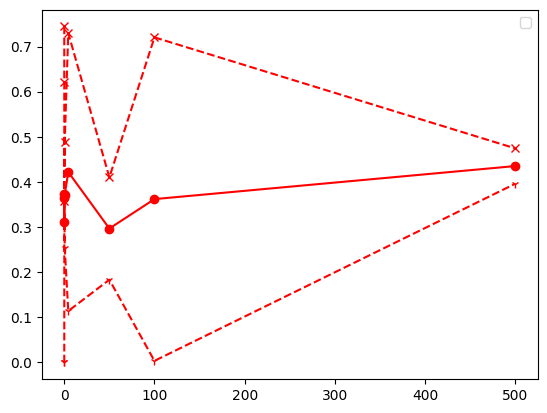

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.11/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.9/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.14/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.5/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.6/'
              ]
x_vals = [0.00001, 0.001, 0.05, 0.5, 4.44, 50, 100, 500] # x 10^5
# 0.05, 0.5, 500

for rand_idx,color in zip([6],['red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot(x_vals, l1, marker='o', color=color)
    plt.plot(x_vals, l2, '--', marker='1', color=color)
    plt.plot(x_vals, l3, '--', marker='x', color=color)

print(l1)
print(l2)
print(l3)

plt.legend()
plt.show()

In [ ]:
# y_aux, y_old = [], []
# for i,(path, m) in enumerate(zip(paths,markers)):
#     y = np.loadtxt(path+expt+'wd.txt', dtype=float)
#     y_aux.append(y[0])
#     y_old.append(y[1])
#     # print(y)
#     plt.plot(i,y[0], marker=m)
#     plt.plot(i,y[1], marker=m)
# plt.plot(y_aux, label='wd_la')
# plt.plot(y_old, label='wd_old')
# plt.legend()
# plt.show()

### Func Def

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import re

In [5]:
def get_f1_at_each_step(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return [np.mean(f1_matrix[i,:i+1]) for i in range(6)]

def get_forg_at_each_step(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    bwt = [0]
    for i in [1,2,3,4,5]:
        temp_bwt=[]
        for j in range(i):
            temp_bwt.append(f1_matrix[i,j]-f1_matrix[i-1,j])
        bwt.append(np.mean(temp_bwt))
    return bwt

def get_new_at_each_step(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return [f1_matrix[i,i] for i in range(6)]

def get_overall_f1(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return np.mean(f1_matrix[1,:2])

def get_overall_f1_all(path,t=6):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    if t==6:
      return np.mean(f1_matrix[5,:])
    else: # t is a list
      return np.mean([f1_matrix[5,i] for i in t])

def get_forgetting(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    temp_forgetting = []
    for i in range(1): # for i in range(5):
        temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[1,i]) # temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
    return np.mean(temp_forgetting)

def get_forgetting_all(path,t=6):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    temp_forgetting = []
    for i in range(5):
        temp_forgetting.append(np.max(f1_matrix[i:-1,i])-f1_matrix[5,i])
    if t==6:
        return np.mean(temp_forgetting)
    else: # t is a list
        return np.mean([temp_forgetting[i] for i in t if i!=5])

def get_newtask(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return f1_matrix[1,1]

def get_newtask_all(path,t=6):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    new_task = [f1_matrix[i,i] for i in range(6)]
    if t==6:
        return np.mean(new_task)
    else:
        return np.mean([new_task[i] for i in t])

def get_oldtask(path):
    list_of_lists = []
    with open(path, 'r') as f:
        for line in f:
            inner_list = [float(elt.strip()) for elt in line.split('\t')]
            list_of_lists.append(inner_list)
    f1_matrix = np.array(list_of_lists)
    return f1_matrix[1,0]

def get_res_fname(rand_idx,path,dataset):
    if 'ANCLMAS' in path or 'ANCLEWC' in path:
        return dataset+'_bert_adapter_ewc_ancl_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    elif 'ANCLLWF' in path:
        return dataset+'_bert_adapter_lwf_ancl_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    elif 'LWF' in path:
        return dataset+'_bert_adapter_lwf_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    elif 'LAEWC' in path or 'LAMAS' in path:
        return dataset+'_bert_adapter_ewc_freeze_'+'random'+str(rand_idx)+'_seed0_f1.txt'
    else:
        return dataset+'_bert_adapter_ewc_'+'random'+str(rand_idx)+'_seed0_f1.txt'

### WD

In [ ]:
dataset='annomi'
# path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAMAS_wlast_AdaptZero_2tasks.ind_max.'
path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets1 = [
    # # ['/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast.ind_max.1/'
    # ['/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.2/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.3/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.4/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.5/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.6/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.7/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.8/'
    # ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.9/'
    # ]
        ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.7/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.8/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.9/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.4/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.6/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv2.ind_max.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv2.ind_max.8/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv2.ind_max.9/'
    ]
]
# m_labels = [100,200,400,500,600,800,1000,1500]
m_labels = [1,10,50,100,500,800,100,10,50]
markers = ['x','x','x','x','x','x','o','o','o']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
for ax_idx,paths in enumerate(path_sets1):
    # for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    for rand_idx,color in zip([0],['gold']):
        for path,m_label,marker in zip(paths,m_labels,markers):
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            forg = get_forgetting(ypath)*100
            newtask = get_newtask(ypath)*100

            fname = re.findall(r'\d+', path[-3:])[0]
            with open(path_alpharel+fname+'/random'+str(rand_idx)+'_seed0'+'model_1_relative_fisher.pkl', 'rb') as handle:
                alpha_rel = CPU_Unpickler(handle).load()
            with open(path+expt+'_wd_old_magn.pkl', 'rb') as handle:
                wd_old_magn = CPU_Unpickler(handle).load()
            cnt_tot = 0
            wd_high, cnt_wd_high = 0, 0
            wd_low = 0
            for k,v_ar in alpha_rel.items():
              if 'output.adapter' in k or 'output.LayerNorm' in k or (dataset=='hwu64' and 'last' in k):
                  try:
                      assert v_ar.shape==wd_old_magn[k].shape
                  except AttributeError:
                      print(k, wd_old_magn[k], v_ar.shape)
                  v_ar, wd = v_ar.flatten().numpy(), wd_old_magn[k].flatten().numpy()
                  cnt_tot += len(v_ar)
                  wd_high += np.sum(wd[np.where(v_ar>0.5)], axis=0)
                  cnt_wd_high += len(wd[np.where(v_ar>0.5)])
                  wd_low += np.sum(wd[np.where(v_ar<=0.5)], axis=0)
            perc_wd_high = cnt_wd_high/cnt_tot
            wd_high = wd_high/cnt_wd_high
            wd_low = wd_low/(cnt_tot-cnt_wd_high)
            axes[0,0].plot(wd_high, forg, marker=marker, color=color)
            axes[0,0].text(wd_high, forg+2, str(m_label)+','+str("{:1.2f}".format(perc_wd_high)), ha="center")
            axes[0,1].plot(wd_high, newtask, marker=marker, color=color)
            axes[0,1].text(wd_high, newtask+2, str(m_label)+','+str("{:1.2f}".format(perc_wd_high)), ha="center")
            axes[1,0].plot(wd_low, forg, marker=marker, color=color)
            axes[1,0].text(wd_low, forg+2, "%d" %m_label, ha="center")
            axes[1,1].plot(wd_low, newtask, marker=marker, color=color)
            axes[1,1].text(wd_low, newtask+2, "%d" %m_label, ha="center")

plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.2/hwu64_bert_adapter_ewc_random0_seed0_f1.txt'

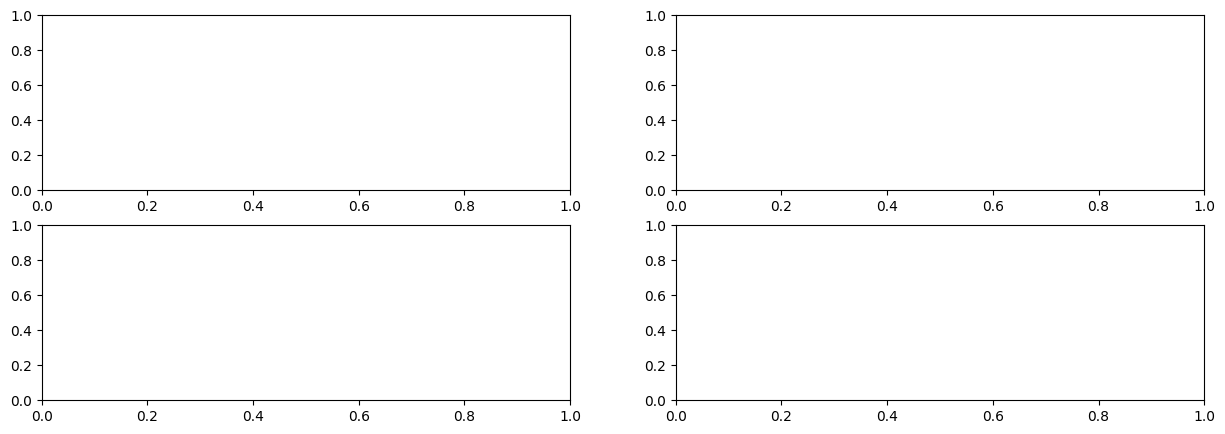

In [ ]:
dataset='hwu64'
path_alpharel = '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAMAS_wlast_AdaptZero_2tasks.ind_max.'
path_sets1 = [
    # ['/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast.ind_max.1/'
    ['/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.2/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.3/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.5/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.6/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.7/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.8/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MASMax_wlast_2tasks.ind_max.9/'
    ]
]
m_labels = [100,200,400,500,600,800,1000,1500]
markers = ['x','x','x','x','x','x','x','x']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
for ax_idx,paths in enumerate(path_sets1):
    # for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    for rand_idx,color in zip([0],['gold']):
        for path,m_label,marker in zip(paths,m_labels,markers):
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            forg = get_forgetting(ypath)*100
            newtask = get_newtask(ypath)*100

            fname = re.findall(r'\d+', path[-3:])[0]
            with open(path_alpharel+fname+'/random'+str(rand_idx)+'_seed0'+'model_1_relative_fisher.pkl', 'rb') as handle:
                alpha_rel = CPU_Unpickler(handle).load()
            with open(path+expt+'_wd_old_magn.pkl', 'rb') as handle:
                wd_old_magn = CPU_Unpickler(handle).load()
            cnt_tot = 0
            wd_high, cnt_wd_high = 0, 0
            wd_low = 0
            for k,v_ar in alpha_rel.items():
              if 'output.adapter' in k or 'output.LayerNorm' in k or (dataset=='hwu64' and 'last' in k):
                  try:
                      assert v_ar.shape==wd_old_magn[k].shape
                  except AttributeError:
                      print(k, wd_old_magn[k], v_ar.shape)
                  v_ar, wd = v_ar.flatten().numpy(), wd_old_magn[k].flatten().numpy()
                  cnt_tot += len(v_ar)
                  wd_high += np.sum(wd[np.where(v_ar>0.5)], axis=0)
                  cnt_wd_high += len(wd[np.where(v_ar>0.5)])
                  wd_low += np.sum(wd[np.where(v_ar<=0.5)], axis=0)
            perc_wd_high = cnt_wd_high/cnt_tot
            wd_high = wd_high/cnt_wd_high
            wd_low = wd_low/(cnt_tot-cnt_wd_high)
            axes[0,0].plot(wd_high, forg, marker=marker, color=color)
            axes[0,0].text(wd_high, forg+2, str(m_label)+','+str("{:1.2f}".format(perc_wd_high)), ha="center")
            axes[0,1].plot(wd_high, newtask, marker=marker, color=color)
            axes[0,1].text(wd_high, newtask+2, str(m_label)+','+str("{:1.2f}".format(perc_wd_high)), ha="center")
            axes[1,0].plot(wd_low, forg, marker=marker, color=color)
            axes[1,0].text(wd_low, forg+2, "%d" %m_label, ha="center")
            axes[1,1].plot(wd_low, newtask, marker=marker, color=color)
            axes[1,1].text(wd_low, newtask+2, "%d" %m_label, ha="center")

plt.legend()
plt.show()

### WD (Orig)

In [ ]:
path_sets = [[
    '/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptZero_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTEasy_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKT_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrictv2_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrict_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTStrictv3_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptOne_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
],
    [
    '/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptZero_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTEasy_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKT_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTCFsv1_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTCFsv2_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTCFsv3_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTStrictv2_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTStrict_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptKTStrictv3_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LAEWC_wlast_AdaptOne_2tasks.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_EWCMax_wlast_2tasks.4/'
]]

marker_labels = [
    'None','Low-None','Low-RelativeImp'
    ,'Med-None','Med-RelativeImp','Med-PasImp'
    ,'Strong-None','Strong-RelativeImp','Strong-PastImp'
    ,'Frozen','ANCL','Low-PasImp' # EWC
]

markers = ['o','x','X'
,'1','2','3'
,'>','^','<'
,'.','h','+']

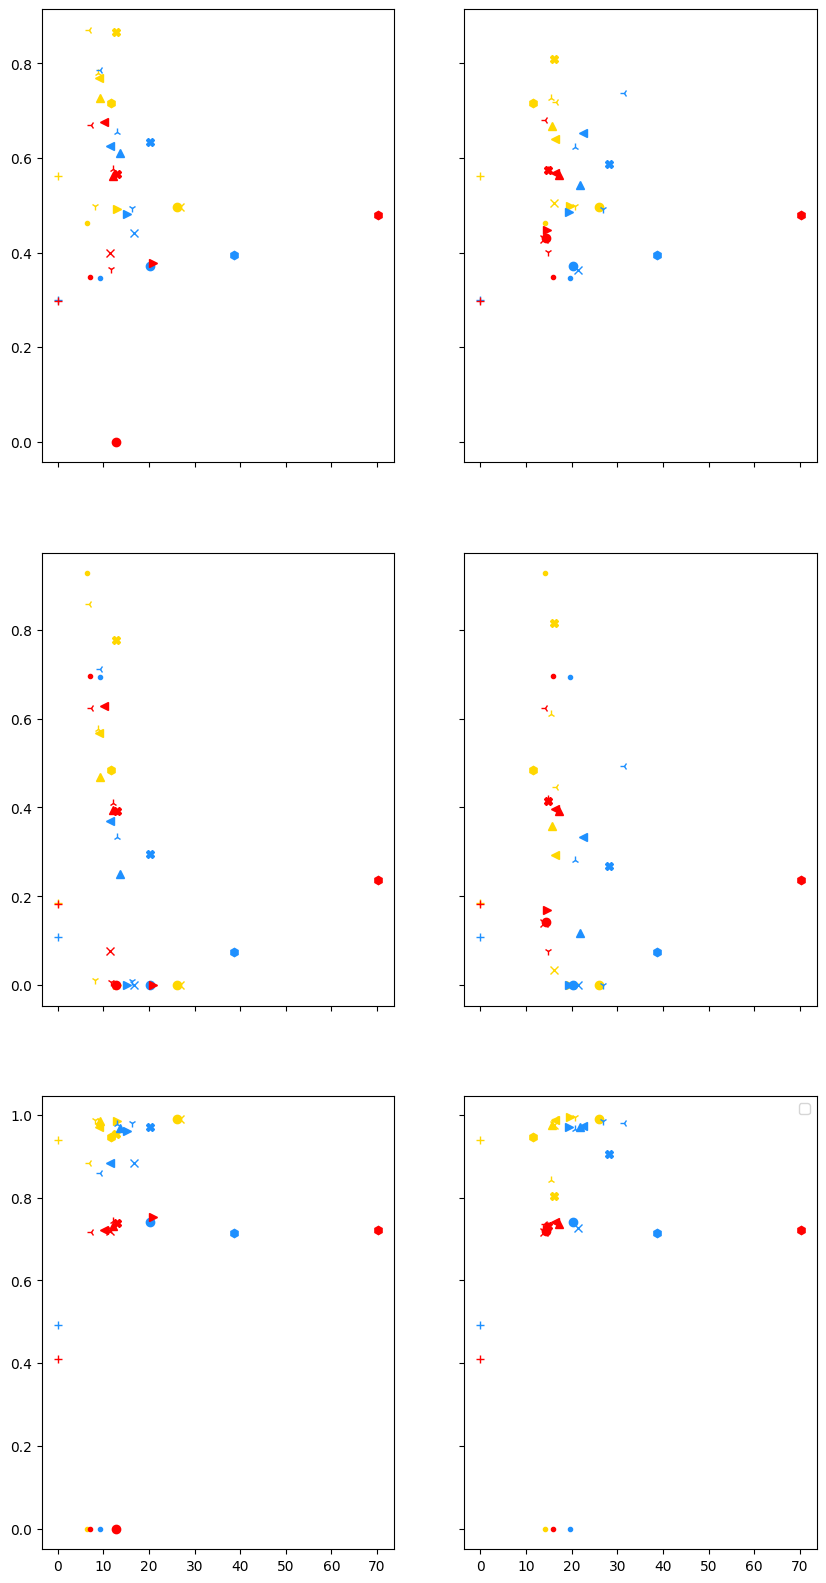

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', sharey='row', figsize=(10, 20))
for ax_idx,paths in enumerate(path_sets):
    for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
        for path, m in zip(paths,markers):
            if path[-1]!='/':
                best_hp_idx = 0
                best_ov_f1 = 0
                for hp_idx in ['.1/','.2/','.3/','.4/']:
                    temp_path = path + hp_idx
                    ypath = temp_path + get_res_fname(rand_idx,path)
                    try:
                        ov_f1 = get_overall_f1(ypath)
                    except FileNotFoundError:
                        continue
                    if ov_f1 > best_ov_f1:
                        best_ov_f1 = ov_f1
                        best_hp_idx = hp_idx
                path = path + best_hp_idx

            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path)
            ov_f1 = get_overall_f1(ypath)
            old = get_oldtask(ypath)
            new = get_newtask(ypath)

            if '_EWC' in path:
                # x_vals = np.array(plt.gca().get_xlim())
                # x_vals = [0,70]
                # axes[0,ax_idx].plot(x_vals, ov_f1 + 0 * x_vals, '--')
                # axes[1,ax_idx].plot(x_vals, old + 0 * x_vals, '--')
                # axes[2,ax_idx].plot(x_vals, new + 0 * x_vals, '--')
                x = 0,0
            else:
                x = np.loadtxt(path+expt+'wd.txt', dtype=float)

            axes[0,ax_idx].plot(x[0],ov_f1, marker=m, color=color)
            axes[1,ax_idx].plot(x[0],old, marker=m, color=color)
            axes[2,ax_idx].plot(x[0],new, marker=m, color=color)

plt.legend()
plt.show()

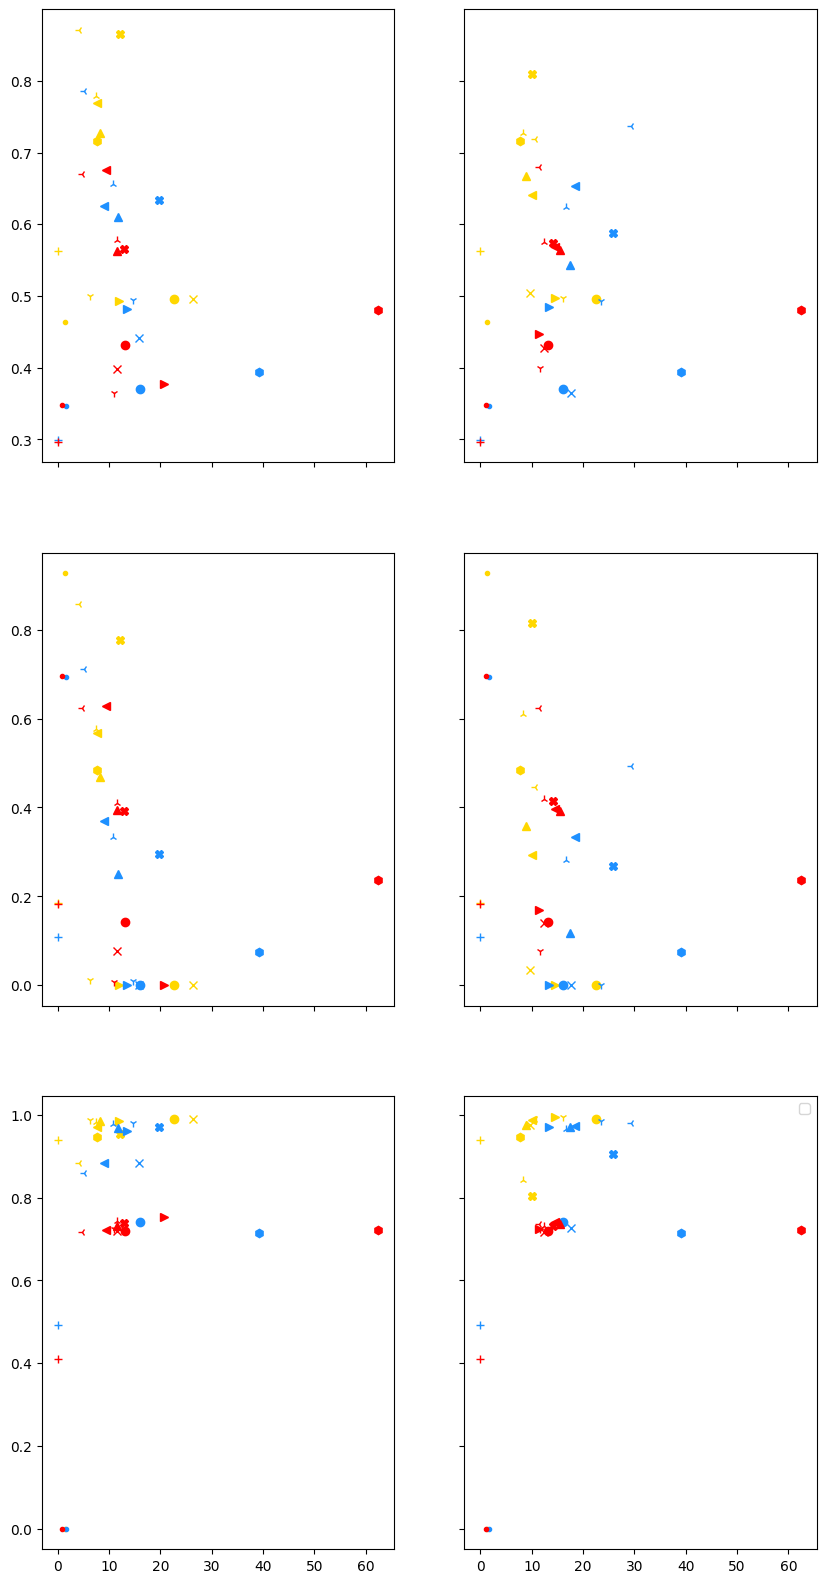

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', sharey='row', figsize=(10, 20))
for ax_idx,paths in enumerate(path_sets):
    for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
        for path, m in zip(paths,markers):
            if path[-1]!='/':
                best_hp_idx = 0
                best_ov_f1 = 0
                for hp_idx in ['.1/','.2/','.3/','.4/']:
                    temp_path = path + hp_idx
                    ypath = temp_path + get_res_fname(rand_idx,path)
                    try:
                        ov_f1 = get_overall_f1(ypath)
                    except FileNotFoundError:
                        continue
                    if ov_f1 > best_ov_f1:
                        best_ov_f1 = ov_f1
                        best_hp_idx = hp_idx
                path = path + best_hp_idx

            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path)
            ov_f1 = get_overall_f1(ypath)
            old = get_oldtask(ypath)
            new = get_newtask(ypath)

            if '_EWC' in path:
                # x_vals = np.array(plt.gca().get_xlim())
                # x_vals = [0,70]
                # axes[0,ax_idx].plot(x_vals, ov_f1 + 0 * x_vals, '--')
                # axes[1,ax_idx].plot(x_vals, old + 0 * x_vals, '--')
                # axes[2,ax_idx].plot(x_vals, new + 0 * x_vals, '--')
                x = 0,0
            else:
                x = np.loadtxt(path+expt+'wd.txt', dtype=float)

            axes[0,ax_idx].plot(x[1],ov_f1, marker=m, color=color)
            axes[1,ax_idx].plot(x[1],old, marker=m, color=color)
            axes[2,ax_idx].plot(x[1],new, marker=m, color=color)

plt.legend()
plt.show()

### Hyper-paramters

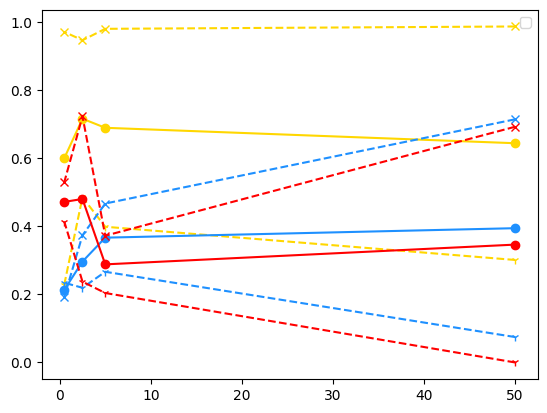

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.3/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLEWC_wlast_2tasks.4.4/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([50, 5, 2.5, 0.5], l1, marker='o', color=color) x 10^5
    plt.plot([50, 5, 2.5, 0.5], l2, '--', marker='1', color=color)
    plt.plot([50, 5, 2.5, 0.5], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

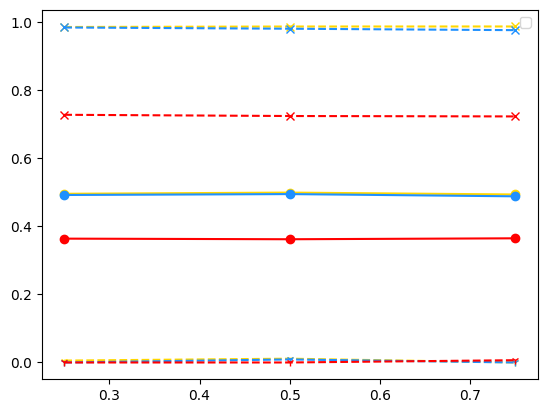

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv1_2tasks.4.3/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([0.25, 0.5, 0.75], l1, marker='o', color=color)
    plt.plot([0.25, 0.5, 0.75], l2, '--', marker='1', color=color)
    plt.plot([0.25, 0.5, 0.75], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

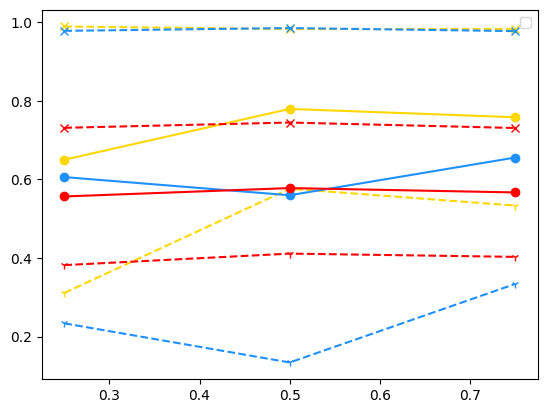

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv2_2tasks.4.3/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([0.25, 0.5, 0.75], l1, marker='o', color=color)
    plt.plot([0.25, 0.5, 0.75], l2, '--', marker='1', color=color)
    plt.plot([0.25, 0.5, 0.75], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

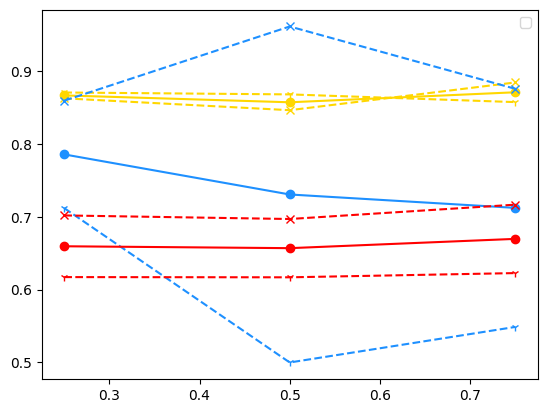

In [ ]:
paths_ancl = ['/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4.1/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4.2/'
              ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAEWC_wlast_AdaptKTCFsv3_2tasks.4.3/']
for rand_idx,color in zip([0,3,6],['gold','dodgerblue','red']):
    l1 = []
    l2 = []
    l3 = []
    for path in paths_ancl:
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        # x = np.loadtxt(path+expt+'wd.txt', dtype=float)

        ypath = path + get_res_fname(rand_idx,path)

        l1.append(get_overall_f1(ypath))
        # l2.append(get_forgetting(ypath))
        l2.append(get_oldtask(ypath))
        l3.append(get_newtask(ypath))

    plt.plot([0.25, 0.5, 0.75], l1, marker='o', color=color)
    plt.plot([0.25, 0.5, 0.75], l2, '--', marker='1', color=color)
    plt.plot([0.25, 0.5, 0.75], l3, '--', marker='x', color=color)

plt.legend()
plt.show()

### ANCL-EWC

.6
[54.26333333333333]
[42.60666666666666, 45.785000000000004]
[52.94833333333333, 52.82666666666667, 52.741666666666674]
[52.18666666666666]
[]
.1
.1
.2
.4
[7.533333333333335, 20.886666666666667, 35.87166666666666, 14.785]
[14.231666666666667]
[3.111666666666667, 14.154999999999998]
[20.976666666666667]
[12.461666666666666]


.1
[49.17333333333333]
[]
[]
[]
[]


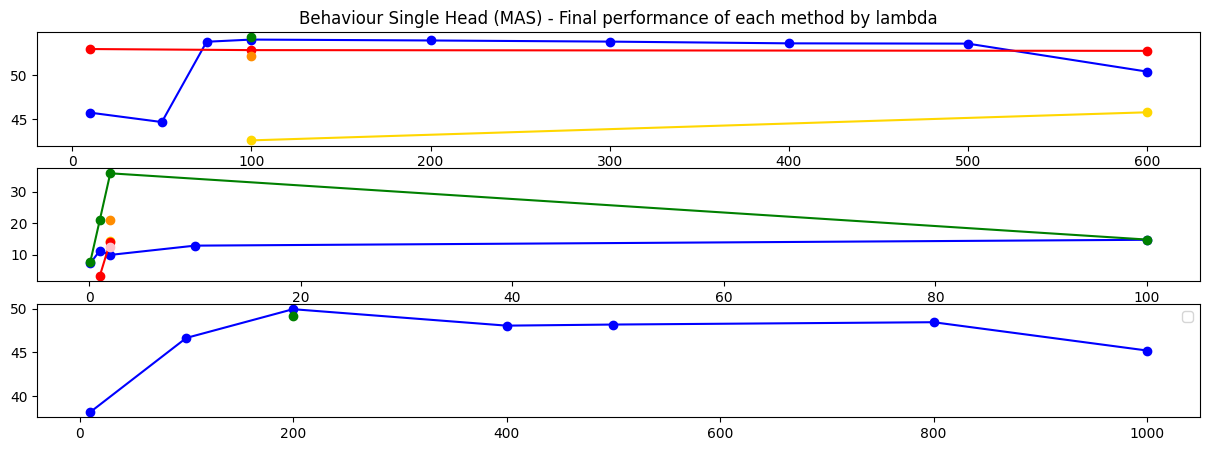

In [ ]:
t = 6 # [2,3,4]: 500, [1,2,4]: 100, [0,2,5]:100, [0,1,3,5]:500, [0,2,4,5]:100, [1,2,3,5]:500
datasets=[ #'annomi',
          'annomi','hwu64','annomi'] #,'hwu64']
adapt_types = ['KT','KTCFsv2','KTCFsv1','KTCFsv2L1']
adapt_colors = ['gold','red','darkorange','pink']
# path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets = [
    # ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.3/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.1/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.2/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.8/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.9/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.10/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.4/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.5/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.7/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.6/'
    # ],
    ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.14/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.18/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.19/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.13/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.15/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.12/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.16/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.17/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.11/'
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.6/',
     '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.5/',
     '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.7/',
     '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.4/',
     '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.3/',
    #  '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.2/'
    ],
    # ['/content/gdrive/MyDrive/Collas24/IntentSH_EWC_wlast.4/', # EWC
    #  '/content/gdrive/MyDrive/Collas24/IntentSH_EWC_wlast.5/']
    ['/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.1/'
    ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.2/'
    ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.4/'
    ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.5/'
    ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.3/'
    ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.6/'
    ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_MAS.7/']
  ]

x_label_sets = [ # [0.01,0.1,1, 3,5,6,10], #, 100,200,500]
                [10,50,75,100,200,300,400,500,600]
                ,[0.1,1,2 ,10,100]#,1000]
                # ,[5000000,10000000]
                 ,[10,100,200,400,500,800,1000]
                ]
x_label_sets_ancl = [ [100]
                    ,[0.1,1,2 ,100]#,1000]
                    ,[200]
                    ]
x_label_sets_la = [# [1,3,5,6],
                   {'KT':[100, 600], 'KTCFsv2':[10, 100, 600], 'KTCFsv1':[100]}
                   ,{'KT':[2], 'KTCFsv2':[1,2], 'KTCFsv1':[2], 'KTCFsv2L1':[2]}
                   ,{}
                   ]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
for ax_idx,(dataset,paths,x_labels,x_labels_ancl,x_labels_la) in enumerate(zip(datasets,path_sets,x_label_sets,x_label_sets_ancl,x_label_sets_la)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        l1_ancl, l2_ancl, l3_ancl = [], [], []
        l1_la, l2_la, l3_la = {}, {}, {}
        for adapt_type in adapt_types:
            l1_la[adapt_type], l2_la[adapt_type], l3_la[adapt_type] = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6 or type(t)==list:
                l1.append(get_overall_f1_all(ypath,t)*100)
                l2.append(get_forgetting_all(ypath,t)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)

            best_ancl_idx = '.1'
            best_score = 0
            for ancl_idx in ['.1','.2','.3','.4','.5','.6','.7','.8']:
                ancl_path = path[:-1].replace('MAS','ANCLMAS').replace('EWC','ANCLEWC') + ancl_idx + '/'
                ypath = ancl_path + get_res_fname(rand_idx,ancl_path,dataset)
                try:
                    if t==6 or type(t)==list:
                        score = get_overall_f1_all(ypath,t)
                    else:
                        score = get_overall_f1(ypath)
                except FileNotFoundError:
                    continue
                if score > best_score:
                    best_score = score
                    best_ancl_idx = ancl_idx
            if best_score>0:
                ancl_path = path[:-1].replace('MAS','ANCLMAS').replace('EWC','ANCLEWC') + best_ancl_idx + '/'
                print(best_ancl_idx)
                ypath = ancl_path + get_res_fname(rand_idx,ancl_path,dataset)
                if t==6 or type(t)==list:
                    l1_ancl.append(get_overall_f1_all(ypath,t)*100)
                    l2_ancl.append(get_forgetting_all(ypath,t)*100)
                else:
                    l1_ancl.append(get_overall_f1(ypath)*100)
                    l2_ancl.append(get_forgetting(ypath)*100)

            for adapt_type in adapt_types:
                la_path = path.replace('_MAS_wlast','_NoL1LAMAS_wlast_Adapt'+adapt_type).replace('_MAS','_NoL1LAMAS_Adapt'+adapt_type)
                ypath = la_path + get_res_fname(rand_idx,la_path,dataset)
                try:
                    if t==6 or type(t)==list:
                        l1_la[adapt_type].append(get_overall_f1_all(ypath,t)*100)
                        l2_la[adapt_type].append(get_forgetting_all(ypath,t)*100)
                    else:
                        l1_la[adapt_type].append(get_overall_f1(ypath)*100)
                        l2_la[adapt_type].append(get_forgetting(ypath)*100)
                except FileNotFoundError:
                    pass

        axes[ax_idx].plot(x_labels, l1, marker='o', color='blue')
        if len(l1_ancl)>0: axes[ax_idx].plot(x_labels_ancl, l1_ancl, marker='o', color='green')
        print(l1_ancl)
        for adapt_type,color in zip(adapt_types,adapt_colors):
            if len(l1_la[adapt_type])>0: axes[ax_idx].plot(x_labels_la[adapt_type], l1_la[adapt_type], marker='o', color=color)
            print(l1_la[adapt_type])

        # axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        # axes[ax_idx,1].plot(x_labels, l2_ancl, marker='o', color='green')
        # axes[ax_idx,1].plot(x_labels_la, l2_la, marker='o', color='gold')

axes[0].title.set_text('Behaviour Single Head (MAS) - Final performance of each method by lambda')
# axes[1].title.set_text('Intent Single Head (MAS) - Final performance by lambda')
plt.legend()
plt.show()

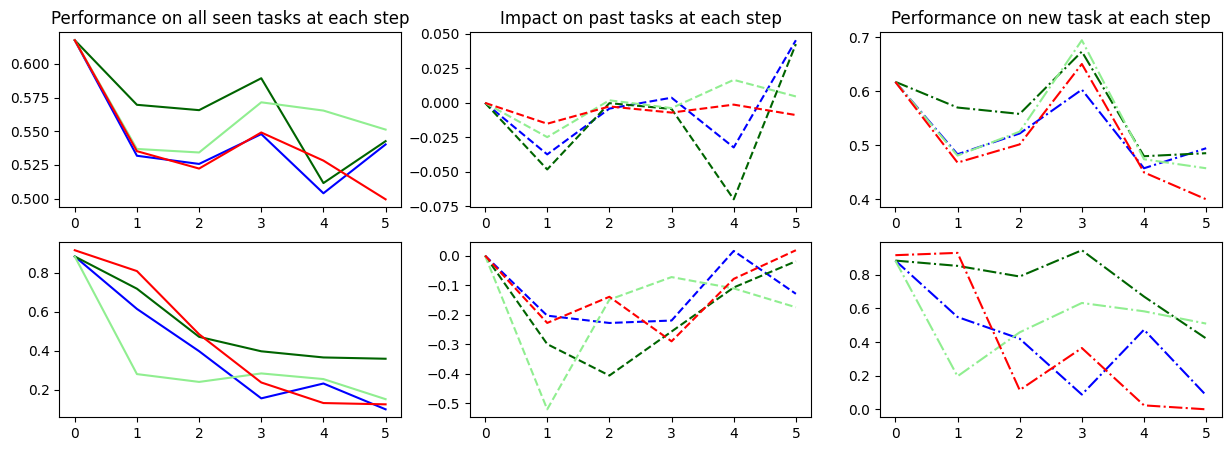

In [ ]:
datasets=['annomi','hwu64']
path_sets = [['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.13/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.6/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.19/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptKTCFsv1FF.13.pdmsd/'] #KTCFsv1.13.3, KTCFsv2.13.4
             ,['/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.7/'
                 ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast.7.2/'
                 ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast.2/' ##
               ,'/content/gdrive/MyDrive/Collas24/IntentSH_NoL1LAMAS_wlast_AdaptKTCFsv2L1.7/'
             ]
]
rand_idx = 0
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
for row_idx,(paths,dataset) in enumerate(zip(path_sets,datasets)):
    for path,color in zip(paths,['blue','darkgreen','lightgreen','red']):
        expt = 'random'+str(rand_idx)+'_seed0_task1'
        ypath = path + get_res_fname(rand_idx,path,dataset)
        l1 = get_f1_at_each_step(ypath)
        axes[row_idx,0].plot(l1,color=color)
        axes[0,0].title.set_text('Performance on all seen tasks at each step')
        l2 = get_forg_at_each_step(ypath)
        axes[row_idx,1].plot(l2,'--',color=color)
        axes[0,1].title.set_text('Impact on past tasks at each step')
        l3 = get_new_at_each_step(ypath)
        axes[row_idx,2].plot(l3,'-.',color=color)
        axes[0,2].title.set_text('Performance on new task at each step')

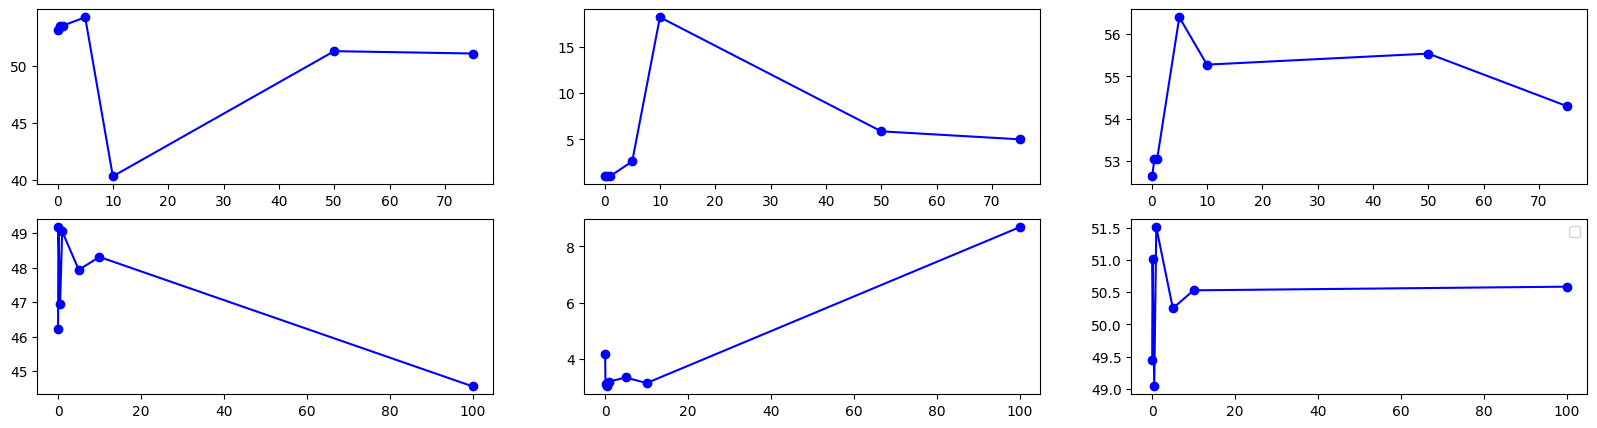

In [ ]:
t = 6 # [2,3,4]:5, [1,2,4]:5, [0,2,5]:5, [0,1,3,5]:5, [0,2,4,5]:5, [1,2,3,5]:5
datasets=['annomi','annomi'] #,'hwu64']
path_sets = [
    # ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.7/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.8/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.4/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.5/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.1/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.6/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.2/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.10.3/'
    # ]
      ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.1/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.5/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.2/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.6/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.3/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.4/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS.13.7/'
    ],
    [
      '/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.4.7/'
      ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.4.1/'
      ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.4.5/'
      ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.4.2/'
      ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.4.6/'
      ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.4.3/'
      ,'/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLMAS.4.4/'
    ]
  ]

x_label_sets = [# [0.01,0.05,0.1,0.3,0.5,0.6,1,3]
                [0.1, 0.5, 1, 5, 10, 50, 75]
                ,[0.01,0.1,0.5,1,5,10,100]
                ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6 or type(t)==list:
                l1.append(get_overall_f1_all(ypath,t)*100)
                l2.append(get_forgetting_all(ypath,t)*100)
                l3.append(get_newtask_all(ypath,t)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)
                l3.append(get_newtask(ypath)*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='blue')


plt.legend()
plt.show()

22.562285714285714 11845.2
26.25448888888889 11814.52
33.15242222222222 14918.59


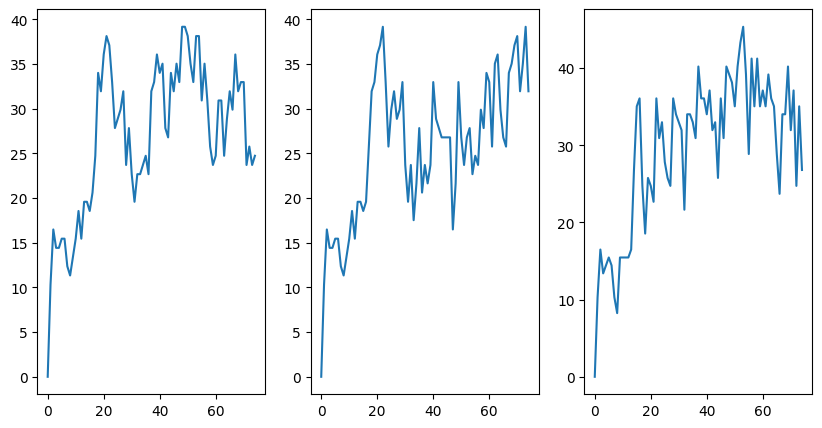

In [ ]:
paths = ['/content/gdrive/MyDrive/Collas24/Test_IntentSH_MAS_wlast.0/'
        ,'/content/gdrive/MyDrive/Collas24/Test_IntentSH_MAS_wlast.5/'
        ,'/content/gdrive/MyDrive/Collas24/Test_IntentSH_MAS_wlast.3/'
        ]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i,path in enumerate(paths):
    expt = 'random0_seed0_task1'
    with open(path+expt+'_step_wise_updates.txt', 'r') as file:
        updates = np.loadtxt(file)
        axes[i].plot(updates[:75]) # First epoch
        print(np.mean(updates),np.sum(updates))

### ANCL-LWF

In [ ]:
t = 6 # [2,3,4]:2 , [1,2,4]:3 , [0,2,5]:10/2, [0,1,3,5]:3, [0,2,4,5]:2, [1,2,3,5]:2, [0,1]:17, [1,2]:3, [0,2]:17, [1,5]:2, [0,3]:17, [0,4]:17
datasets=['annomi','hwu64','annomi','hwu64']
# path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets = [
    # ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.1/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.2/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.3/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.7/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.4/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.8/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.5/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.6/'
    # ],
    [
        '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.9/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.10/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.11/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.12/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.13/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.14/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.15/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.16/'
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast.' + str(i) + '/' for i in range(1,18)
    ],
    ['/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_LWF.' + str(i) + '/' for i in range(1,9)
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentMH/IntentMH_LWF.' + str(i) + '/' for i in range(1,9)
    ]
  ]

x_label_sets = [#[1,2,3,4,5,6,7,8]
                [1,2,3,4,5,6,7,8]
                ,[i for i in range(1,18)]
                , [i for i in range(1,9)]
                , [i for i in range(1,9)]]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6 or type(t)==list:
                l1.append(get_overall_f1_all(ypath,t)*100)
                l2.append(get_forgetting_all(ypath,t)*100)
                l3.append(get_newtask_all(ypath,t)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)
                l3.append(get_newtask(ypath)*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        print(l1)
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='blue')


plt.legend()
plt.show()

In [ ]:
t = 6
datasets=['annomi','hwu64','annomi']
# path_alpharel = '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_NoL1LAMAS_AdaptZero_2tasks.ind_max.'
path_sets = [
    # ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.14/'
    #   ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.15/'
    #   ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.16/'
    #   ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.17/'
    #   # '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.11/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.12/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.10/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.13/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.9/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.1/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.2/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.3/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.4/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.5/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.6/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.7/'
    # # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.8/'
    # ],
    ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.18/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.19/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.20/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF.21/'
    ],
    ['/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast.' + str(i) + '/' for i in range(1,11)
    ],
    ['/content/gdrive/MyDrive/Collas24/BehavMH/BehavMH_ANCLLWF.' + str(i) + '/' for i in range(1,7)
    ]
  ]

x_label_sets = [ # [1,2,3,4]#[1,2,3,4,5,6,7,8,9,10,11,12,13]
                [1,2,3,4]
                ,[1,2,3,4,5,6,7,8,9,10]
                 ,[i for i in range(1,7)]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6:
                l1.append(get_overall_f1_all(ypath)*100)
                l2.append(get_forgetting_all(ypath)*100)
                l3.append(get_newtask_all(ypath)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)
                l3.append(get_newtask(ypath)*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='lightgreen')
        print(l1)
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='lightgreen')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='lightgreen')


plt.legend()
plt.show()

### CHSF - LWF

[70.15, 60.199999999999996]
[]


FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t3gold/hwu64_bert_adapter_lwf_ancl_random0_seed0_f1.txt'

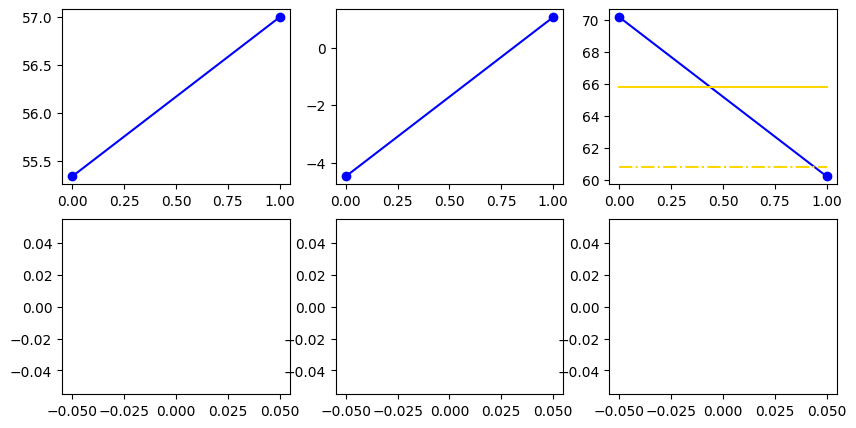

In [9]:
loop_path_sets_bsh = [[
        '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.9/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.10/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF_t1.2/' # lamb=5
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF_t1.1/' # lamb=8
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.11/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.12/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.13/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.14/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.15/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF.16/'
    ],
      [
        '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.1/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.2/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.3/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.4/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.5/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.6/'
      ],
      [
          '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t3.1/'
          ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t3.3/'
          ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t3.4/'
          ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t3.2/'
      ]
                      ]
loop_path_sets_ish = [['/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast.1/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast_t1.1/' # lamb=0.5
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast.2/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast.3/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast.17/'
    ],
      [
       '/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.1/'
       ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.5/'
       ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.4/'
       ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.3/'
       ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.2/'

      ],
      [

      ]
                      ]
loop_thresholds = [[5,20] # task1
                   ,[5,20] # task2
                   ,[5,20] # task3
                   ]


t = [0,1,2,3]
datasets=['annomi','hwu64']#,'annomi','hwu64']
thresholds=loop_thresholds[len(t)-2]
gold_paths = [
    '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t'+str(t[-1])+'gold/' if t[-1]>1 else '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_LWF_t1gold/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t'+str(t[-1])+'gold/' if t[-1]>1 else '/content/gdrive/MyDrive/Collas24/IntentSH_LWF_wlast_t1gold/'
]
path_sets = [
    loop_path_sets_bsh[len(t)-2],
    loop_path_sets_ish[len(t)-2],
  ]

x_label_sets = [[i for i in range(len(loop_path_sets_bsh[len(t)-2]))]
                ,[i for i in range(len(loop_path_sets_ish[len(t)-2]))]
                ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for ax_idx,(dataset,gold_path,threshold,paths,x_labels) in enumerate(zip(datasets,gold_paths,thresholds,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)

            l1.append(get_f1_at_each_step(ypath)[len(t)-1]*100)
            l2.append(get_forg_at_each_step(ypath)[len(t)-1]*100)
            l3.append(get_new_at_each_step(ypath)[len(t)-1]*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        # print(l1)
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='blue')
        print(l3)

        ypath = gold_path + get_res_fname(rand_idx,gold_path,dataset)
        best = get_new_at_each_step(ypath)[len(t)-1]*100
        axes[ax_idx,2].plot(x_labels, [best for x in x_labels], color='gold')
        axes[ax_idx,2].plot(x_labels, [best-threshold for x in x_labels], linestyle='-.', color='gold')

axes[0,2].title.set_text('LWF Performance at task'+str(len(t)-1))
plt.legend()
plt.show()

[47.52, 47.52, 47.52, 47.52, 49.95, 49.95]


[75.05, 79.39, 97.67]


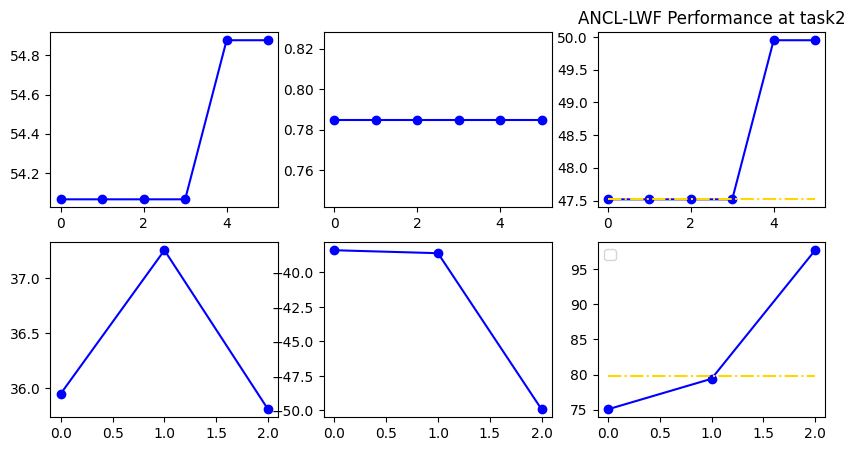

In [7]:
loop_path_sets_bsh = [[
        '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t1.1/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t1.6/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t1.2/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t1.3/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t1.5/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t1.4/'
    ],
    [
     '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.4.1/'
     ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.4.2/'
     ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.4.5/'
     ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.4.4/'
     ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.4.6/'
     ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLLWF_t2.4.3/'
    ]
                      ]
loop_path_sets_ish = [[
    '/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t1.1/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t1.2/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t1.5/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t1.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t1.3/'
    ],
    [
     '/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.5.1/'
     ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.5.3/'
     ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.5.4/'
     ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.5.5/'
     ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLLWF_wlast_t2.5.2/'
    ]
                      ]
loop_thresholds = [[60.57,76.3] # task1
                   ,[47.52,79.72] # task2
                   ]


t = [0,1,2]
datasets=['annomi','hwu64']#,'annomi','hwu64']
thresholds=loop_thresholds[len(t)-2]
path_sets = [
    loop_path_sets_bsh[len(t)-2],
    loop_path_sets_ish[len(t)-2],
  ]

x_label_sets = [[i for i in range(len(loop_path_sets_bsh[len(t)-2]))]
                ,[i for i in range(len(loop_path_sets_ish[len(t)-2]))]
                ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for ax_idx,(dataset,threshold,paths,x_labels) in enumerate(zip(datasets,thresholds,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)

            l1.append(get_f1_at_each_step(ypath)[len(t)-1]*100)
            l2.append(get_forg_at_each_step(ypath)[len(t)-1]*100)
            l3.append(get_new_at_each_step(ypath)[len(t)-1]*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        # print(l1)
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='blue')
        print(l3)

        axes[ax_idx,2].plot(x_labels, [threshold for x in x_labels], linestyle='-.', color='gold')

axes[0,2].title.set_text('ANCL-LWF Performance at task'+str(len(t)-1))
plt.legend()
plt.show()

### CHSF-EWC

In [ ]:
loop_path_sets_bsh = [[
        '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_t1.1/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_t1.2/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_t1.4/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_t1.3/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.14/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.18/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.19/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.13/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.15/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.12/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.16/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.17/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.11/'
    ],
    [
       '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.1/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.2/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.3/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.4/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.5/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.6/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.8/'
      ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.9/'
    ]
                      ]
loop_path_sets_ish = [[
    '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.6/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast_t1.1/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast_t1.3/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast_t1.2/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.5/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.7/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.4/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.3/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.2/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.1/'
    ],
    [
     '/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.1/'
     ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.4/'
     ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.2/'
     ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.3/'
    ]
                      ]
loop_thresholds = [[5,20] # task1
                   ,[5,20] # task2
                   ]


t = [0,1,2]
datasets=['annomi','hwu64']#,'annomi','hwu64']
thresholds=loop_thresholds[len(t)-2]
gold_paths = [
    '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t'+str(t[-1])+'gold/' if t[-1]>1 else '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_t1gold/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t'+str(t[-1])+'gold/' if t[-1]>1 else '/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast_t1gold/'
]
path_sets = [
    loop_path_sets_bsh[len(t)-2],
    loop_path_sets_ish[len(t)-2]
  ]

x_label_sets = [[i for i in range(len(loop_path_sets_bsh[len(t)-2]))]
                ,[i for i in range(len(loop_path_sets_ish[len(t)-2]))]
                ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for ax_idx,(dataset,gold_path,threshold,paths,x_labels) in enumerate(zip(datasets,gold_paths,thresholds,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)

            l1.append(get_f1_at_each_step(ypath)[len(t)-1]*100)
            l2.append(get_forg_at_each_step(ypath)[len(t)-1]*100)
            l3.append(get_new_at_each_step(ypath)[len(t)-1]*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        # print(l1)
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='blue')
        print(l3)

        ypath = gold_path + get_res_fname(rand_idx,gold_path,dataset)
        best = get_new_at_each_step(ypath)[len(t)-1]*100
        axes[ax_idx,2].plot(x_labels, [best for x in x_labels], color='gold')
        axes[ax_idx,2].plot(x_labels, [best-threshold for x in x_labels], linestyle='-.', color='gold')

axes[0,2].title.set_text('MAS Performance at task'+str(len(t)-1))
plt.legend()
plt.show()

In [ ]:
loop_path_sets_bsh = [[
        '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.1/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.2/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.3/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.4/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.7/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.8/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.5/'
        ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t1.6/'
    ],
    [
       '/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7.1/'
       ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7.2/'
       ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7.3/'
       ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7.4/'
       ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7.5/'
       ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7.7/'
       ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_ANCLMAS_t2.7.6/'
    ]
                      ]
loop_path_sets_ish = [[
        '/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.8/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.9/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.1/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.2/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.3/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.7/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.4/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.5/'
        ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t1.1.6/'
    ],
    [
      # '/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.4.1/'
      # ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.4.2/'
      # ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.4.3/'
      # ,'/content/gdrive/MyDrive/Collas24/IntentSH_ANCLMAS_wlast_t2.4.4/'
    ]
                      ]
loop_thresholds = [[57.599,88.73] # task1
                   ,[47.599,75.42] # task2
                   ]


t = [0,1,2]
datasets=['annomi','hwu64']#,'annomi','hwu64']
thresholds=loop_thresholds[len(t)-2]
path_sets = [
    loop_path_sets_bsh[len(t)-2],
    loop_path_sets_ish[len(t)-2]
  ]

x_label_sets = [[i for i in range(len(loop_path_sets_bsh[len(t)-2]))]
                ,[i for i in range(len(loop_path_sets_ish[len(t)-2]))]
                ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
for ax_idx,(dataset,threshold,paths,x_labels) in enumerate(zip(datasets,thresholds,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)

            l1.append(get_f1_at_each_step(ypath)[len(t)-1]*100)
            l2.append(get_forg_at_each_step(ypath)[len(t)-1]*100)
            l3.append(get_new_at_each_step(ypath)[len(t)-1]*100)

        axes[ax_idx,0].plot(x_labels, l1, marker='o', color='blue')
        # print(l1)
        axes[ax_idx,1].plot(x_labels, l2, marker='o', color='blue')
        axes[ax_idx,2].plot(x_labels, l3, marker='o', color='blue')
        print(l3)

        axes[ax_idx,2].plot(x_labels, [threshold for x in x_labels], linestyle='-.', color='gold')

axes[0,2].title.set_text('ANCL-MAS Performance at task'+str(len(t)-1))
plt.legend()
plt.show()

### LA

In [ ]:
t = 6
datasets=['annomi']
adapt_type='KT' # 'KTCFsv2', 'KT'

path_sets = [
    ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.ind_max.8/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.ind_max.9/'
    ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS.ind_max.1/'
    ]
    # ['/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.7/' # t=2
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.8/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.9/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.1/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.4/'
    # ,'/content/gdrive/MyDrive/Collas24/BehavSH/BehavSH_MAS_2tasks.ind_max.6/'
    # ]
  ]

x_label_sets = [[10,50,100]
                # [1,10,50,100,500,800]
                ]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        l1_la, l2_la, l3_la = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6:
                l1.append(get_overall_f1_all(ypath)*100)
                l2.append(get_forgetting_all(ypath)*100)
                l3.append(get_newtask_all(ypath)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)
                l3.append(get_newtask(ypath)*100)

            la_path = path.replace('_MAS_2tasks','_NoL1LAMAS_Adapt'+adapt_type).replace('_EWC_2tasks','_NoL1LAEWC_Adapt'+adapt_type).replace('_MAS','_NoL1LAMAS_Adapt'+adapt_type).replace('_EWC','_NoL1LAEWC_Adapt'+adapt_type)
            ypath = la_path + get_res_fname(rand_idx,la_path,dataset)
            if t==6:
                l1_la.append(get_overall_f1_all(ypath)*100)
                l2_la.append(get_forgetting_all(ypath)*100)
                l3_la.append(get_newtask_all(ypath)*100)
            else:
                l1_la.append(get_overall_f1(ypath)*100)
                l2_la.append(get_forgetting(ypath)*100)
                l3_la.append(get_newtask(ypath)*100)

        axes[0].plot(x_labels, l1, marker='o', color='blue')
        axes[0].plot(x_labels, l1_la, marker='o', color='green')

        axes[1].plot(x_labels, l2, marker='o', color='blue')
        axes[1].plot(x_labels, l2_la, marker='o', color='green')

        axes[2].plot(x_labels, l3, marker='o', color='blue')
        axes[2].plot(x_labels, l3_la, marker='o', color='green')


plt.legend()
plt.show()

In [ ]:
t = 6
datasets=['hwu64']
adapt_type='KT' # 'KTCFsv2'

path_sets = [
    ['/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.ind_max.2/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.ind_max.3/'
    ,'/content/gdrive/MyDrive/Collas24/IntentSH_MAS_wlast.ind_max.6/'
    ]
  ]

x_label_sets = [[100,200,600]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for ax_idx,(dataset,paths,x_labels) in enumerate(zip(datasets,path_sets,x_label_sets)):
    for rand_idx in [0]:
        l1, l2, l3 = [], [], []
        l1_la, l2_la, l3_la = [], [], []
        for path in paths:
            expt = 'random'+str(rand_idx)+'_seed0_task1'

            ypath = path + get_res_fname(rand_idx,path,dataset)
            if t==6:
                l1.append(get_overall_f1_all(ypath)*100)
                l2.append(get_forgetting_all(ypath)*100)
            else:
                l1.append(get_overall_f1(ypath)*100)
                l2.append(get_forgetting(ypath)*100)

            la_path = path.replace('_MAS_wlast_2tasks','_NoL1LAMAS_wlast_Adapt'+adapt_type).replace('_EWC_wlast_2tasks','_NoL1LAEWC_wlast_Adapt'+adapt_type).replace('_MAS_wlast','_NoL1LAMAS_wlast_Adapt'+adapt_type).replace('_EWC_wlast','_NoL1LAEWC_wlast_Adapt'+adapt_type)
            ypath = la_path + get_res_fname(rand_idx,la_path,dataset)
            if t==6:
                l1_la.append(get_overall_f1_all(ypath)*100)
                l2_la.append(get_forgetting_all(ypath)*100)
            else:
                l1_la.append(get_overall_f1(ypath)*100)
                l2_la.append(get_forgetting(ypath)*100)

        axes[0].plot(x_labels, l1, marker='o', color='blue')
        axes[0].plot(x_labels, l1_la, marker='o', color='green')

        axes[1].plot(x_labels, l2, marker='o', color='blue')
        axes[1].plot(x_labels, l2_la, marker='o', color='green')


plt.legend()
plt.show()